In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from LoadData import loadData
from IPython.core.debugger import Tracer
from GetInliersRANSAC import GetInliersRANSAC
from ExtractCameraPose import ExtractCameraPose
from DrawCorrespondence import DrawCorrespondence
from EssentialMatrixFromFundamentalMatrix import EssentialMatrixFromFundamentalMatrix
from LinearTriangulation import LinearTriangulation
from DisambiguateCameraPose import DisambiguateCameraPose
from NonLinearTriangulation import *

%matplotlib inline

# plt.scatter(X_new[:,0], X_new[:,1], c=X_new[:,1], cmap='viridis',s = 1);  #viridis
# plt.set_xlabel('x')
# ax.set_ylabel('y')
# plt.set_ylabel('z');
# axes = plt.gca()
# axes.set_xlim([-1,1])
# axes.set_ylim([-2,2])

#### Reject Outliers and Estimate Fundamental Matrix

In [2]:
Mx,My,M = loadData("Data/")

In [3]:
img1 = 1
img2 = 4
n_images = 6
all_Fs = []
all_inliers = []
X_all = []
visualize = False
# i = 1
# j = 4
# for i in range(1, n_images):
#     for j in range(i+1, n_images + 1):
    
#         img1 = i
#         img2 = j

output = np.logical_and(M[:, img1-1], M[:, img2-1])
indices, = np.where(output == True)
# if(len(indices)<8):
#     continue
pts1 = np.hstack((Mx[indices,img1-1].reshape((-1,1)),My[indices,img1-1].reshape((-1,1))))
pts2 = np.hstack((Mx[indices,img2-1].reshape((-1,1)),My[indices,img2-1].reshape((-1,1))))
best_F, inliers_a, inliers_b = GetInliersRANSAC(np.int32(pts1), np.int32(pts2))


all_Fs.append(best_F)
all_inliers.append(np.hstack((inliers_a, inliers_b)))

if visualize is True:
    out = DrawCorrespondence(img1, img2, inliers_a, inliers_b)

    cv2.imshow("img3", out)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


K = np.array([[568.996140852,0,643.21055941],
     [0, 568.988362396, 477.982801038],
     [0, 0, 1]])
E = EssentialMatrixFromFundamentalMatrix(best_F,K)
R_set,C_set = ExtractCameraPose(E,K)

X = []
for n in range(0,4):
    X.append(LinearTriangulation(K,np.zeros((3,1)),np.identity(3),C_set[n].T,R_set[n],np.int32(pts1),np.int32(pts2)))

X_new, R, C = DisambiguateCameraPose(C_set, R_set, X)
# X_all.append(X_new)

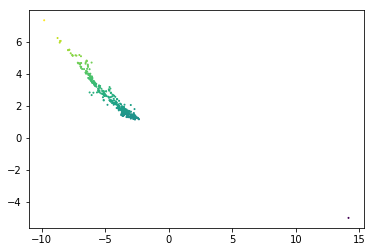

In [4]:
# print(len(X_all))
# X_new = X_all[3]
# for X_new in X_all[3]:
plt.scatter(X_new[:,0], X_new[:,2], c=X_new[:,2], cmap='viridis',s = 1);  #viridis
# plt.set_xlabel('x')
# ax.set_ylabel('y')
# plt.set_ylabel('z');
axes = plt.gca()
#     axes.set_xlim([-5,5])
#     axes.set_ylim([-5,5])